# Практическая работа 2 Обучение с учителем

## Часть 1 Подготовка датасета

### Подключение библиотек

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

### Загрузка датасета

In [2]:
df = pd.read_csv('possum.csv')

### Обработка датасета

In [3]:
# В данном пункте надо удалить записи с пустыми полями и, если это сказано в варианте, удалить лишние поля
# При удаление других полей, если в варианте не сказано, вы должны обосновать удаление комментарием!
df=df.drop(['case'], axis=1)
# Удаление пустых объектов
df=df[(df['age']>0)&(df['footlgth']>0)]
# Или вот так
df=df.dropna()
# Замена текста, если он есть
sexes = {'m':0, 'f':1}
pops = {'Vic':0, 'other':1}
df=df.replace(sexes)
df=df.replace(pops)
# Иные манипуляции. Все они должны быть обоснованы в комментарии

C:\Users\valko\AppData\Local\Temp\ipykernel_26612\3951815626.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace(sexes)
C:\Users\valko\AppData\Local\Temp\ipykernel_26612\3951815626.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace(pops)


### Создание выборок

In [4]:
# Сначала необходимо поделить датасеты на признаки и цель
# Для каждого задания сделать свои
# Для прогнозирования
df_reg_data=df.drop(['taill'], axis=1)
df_reg_target=df['taill']

# Для классификации
df_cl_data=df.drop(['age'], axis=1)
df_cl_target=df['age']


In [5]:
# Теперь деление 
# Коэффициент вы можете изменить, но это надо будет обосновать
data_train_reg, data_test_reg, target_train_reg, target_test_reg = train_test_split(
df_reg_data, df_reg_target,
test_size=0.3, random_state=42
)

data_train_cl, data_test_cl, target_train_cl, target_test_cl = train_test_split(
df_cl_data, df_cl_target,
test_size=0.3, random_state=42
)

## Часть 2 Прогнозирование

### Линейная регрессия

In [6]:
linear_regression = LinearRegression()
model_lin = linear_regression.fit(data_train_reg, target_train_reg)
predicted_lin = model_lin.predict(data_test_reg)

Визуализация результатов

In [7]:
# По образцу из примера к лекции построить таблицу и график
# Самостоятельно определить границы красной линии, основываясь на минимальном и максимальном значениях

### Полиномиальная регрессия

In [8]:
polynomial_regression = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
model_pol = polynomial_regression.fit(data_train_reg, target_train_reg)
predicted_pol = model_pol.predict(data_test_reg)

Визуализация результатов

In [9]:
# Опять же по образцу построить таблицу и график

### Дополнительные методы

In [10]:
# Добавить ячейки для дополнительных методов
# Тип ячейки для названия метода - Markdown
# Для каждого метода вывести таблицу и график
# Если добавлено ещё два метода, вы получаете плюс один балл за работу

### Метрики качества

In [11]:
#Длф каждого из использованных методов вывести по две метрики: r2 и среднеквадратичную ошибку
print("Линейная регрессия")
print("R2")
print(model_lin.score(data_test_reg, target_test_reg))
print("MSE")
print(metrics.mean_squared_error(target_test_reg, predicted_lin))
print("-----------------------")
#Аналогично для остальных

Линейная регрессия
R2
0.6809252733068929
MSE
1.218360780021182
-----------------------


### Вывод по результатам прогнозирования

В этом поле опишите вывод - какая модель лучше, почему, возможно ли вообще прогнозирование 

## Часть 3 Классификация

### Логистическая регрессия

In [12]:
logistic_regression = LogisticRegression(solver='newton-cg')
model_log=logistic_regression.fit(data_train_cl,target_train_cl)
predicted_log = model_log.predict(data_test_cl)

Результаты прогнозирования

In [13]:
# По образцу построить таблицу результатов

Матрица несоответствий

[]

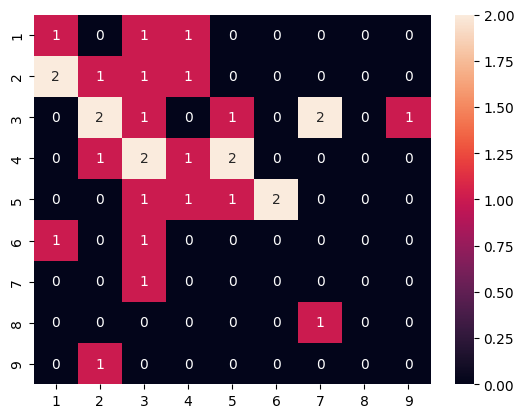

In [14]:
confusion_scores = confusion_matrix(target_test_cl, predicted_log)
confusion_df = pd.DataFrame(confusion_scores, columns=np.sort(target_test_cl.unique()),
index=np.sort(target_test_cl.unique()))
# Не забудьте подписать классы
labels = [1,2,3,4,5,6,7,8,9]
sns.heatmap(confusion_df, annot=True,xticklabels=labels,yticklabels=labels).plot()

### Дополнительные методы

In [15]:
# Если хотите ещё бонусный балл

### Метрики

In [16]:
# Вывести не менее трёх метрик для каждой модели - accuracy, precision, f1_score

### Вывод по прогнозированию

Какой метод показал себя лучше? Что с ошибкой? Можно ли что-то поправить?